In [11]:
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("./data/tracks_by_artist_and_album.csv")

In [4]:
data.head()

,artist,album,track
0,J. Cole,4 Your Eyez Only,For Whom the Bell Tolls
1,J. Cole,4 Your Eyez Only,Immortal
2,J. Cole,4 Your Eyez Only,Deja Vu
3,J. Cole,4 Your Eyez Only,Ville Mentality
4,J. Cole,4 Your Eyez Only,"She's Mine, Pt. 1"


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


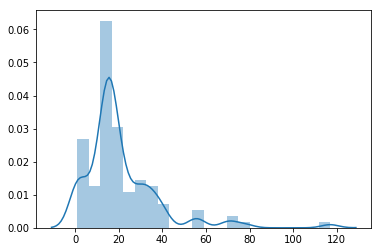

In [23]:
sns.distplot(data.groupby(["artist"]).agg("count")["album"].values)

In [56]:
aggregate = data.groupby(["artist"]).agg("count")
aggregate.reset_index(inplace=True)
aggregate = aggregate[["artist", "track"]]
aggregate.head()

,artist,track
0,2 Chainz,17
1,21 Savage,14
2,21 Savage & Metro Boomin,0
3,"21 Savage, Offset & Metro Boomin",0
4,2Pac,26


In [57]:
aggregate[aggregate["track"] > 10].shape

(87, 2)

In [58]:
aggregate[aggregate["track"] > 20].shape

(35, 2)

In [59]:
aggregate[aggregate["track"] > 20]

,artist,track
4,2Pac,26
18,Boosie BadAzz,24
19,BrockHampton,30
22,DJ Khaled,39
25,Drake,117
26,Eminem,78
30,Future,70
32,G-Eazy,39
33,Gucci Mane,57
35,J. Cole,41


In [36]:
# Definitely exclude the following
# * Tech N9ne Collabos
# * Pink Guy
# * 2Pac
# * DJ Khaled

In [68]:
target_artists = aggregate[aggregate["track"] > 20]
target_artists = target_artists[~target_artists["artist"].isin(["Tech N9ne Collabos", "Pink Guy", "2Pac", "DJ Khaled"])]

In [69]:
target_artists

,artist,track
18,Boosie BadAzz,24
19,BrockHampton,30
22,DJ Khaled,39
25,Drake,117
26,Eminem,78
30,Future,70
32,G-Eazy,39
33,Gucci Mane,57
35,J. Cole,41
38,Jeezy,30


In [71]:
target_artists.to_csv("./data/target_artists.csv", index=False, )